In [2]:
#必要なパッケージのインポート

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import reservoirpy as rpy

from scipy.integrate import solve_ivp
import pandas as pd
from reservoirpy.observables import nrmse, rsquare

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

rpy.verbosity(0)

from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass

# just a little tweak to center the plots, nothing to worry about
from IPython.core.display import HTML
HTML("""
<style>
.img-center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

rpy.set_seed(42)

%time


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.15 µs


In [3]:
# CSVファイルにデータを保存
filename_with_force = 'data/rossler_data_with_shifted_force_8.csv'

# CSVファイルを読み込む
data_loaded_with_force = pd.read_csv(filename_with_force)

# CSVから値を抽出してNumpy配列に格納
X = data_loaded_with_force[['x', 'y', 'P_shifted']].values

X.shape


(45100, 3)

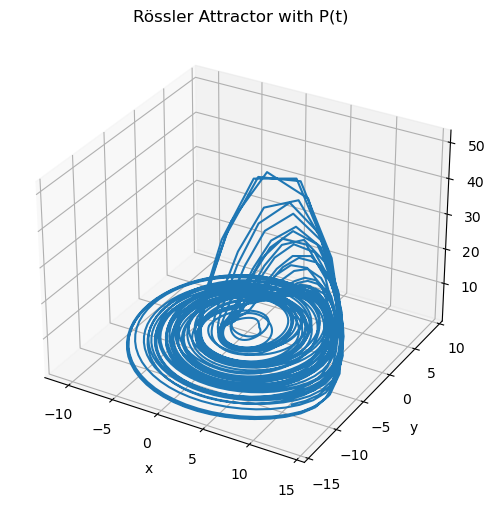

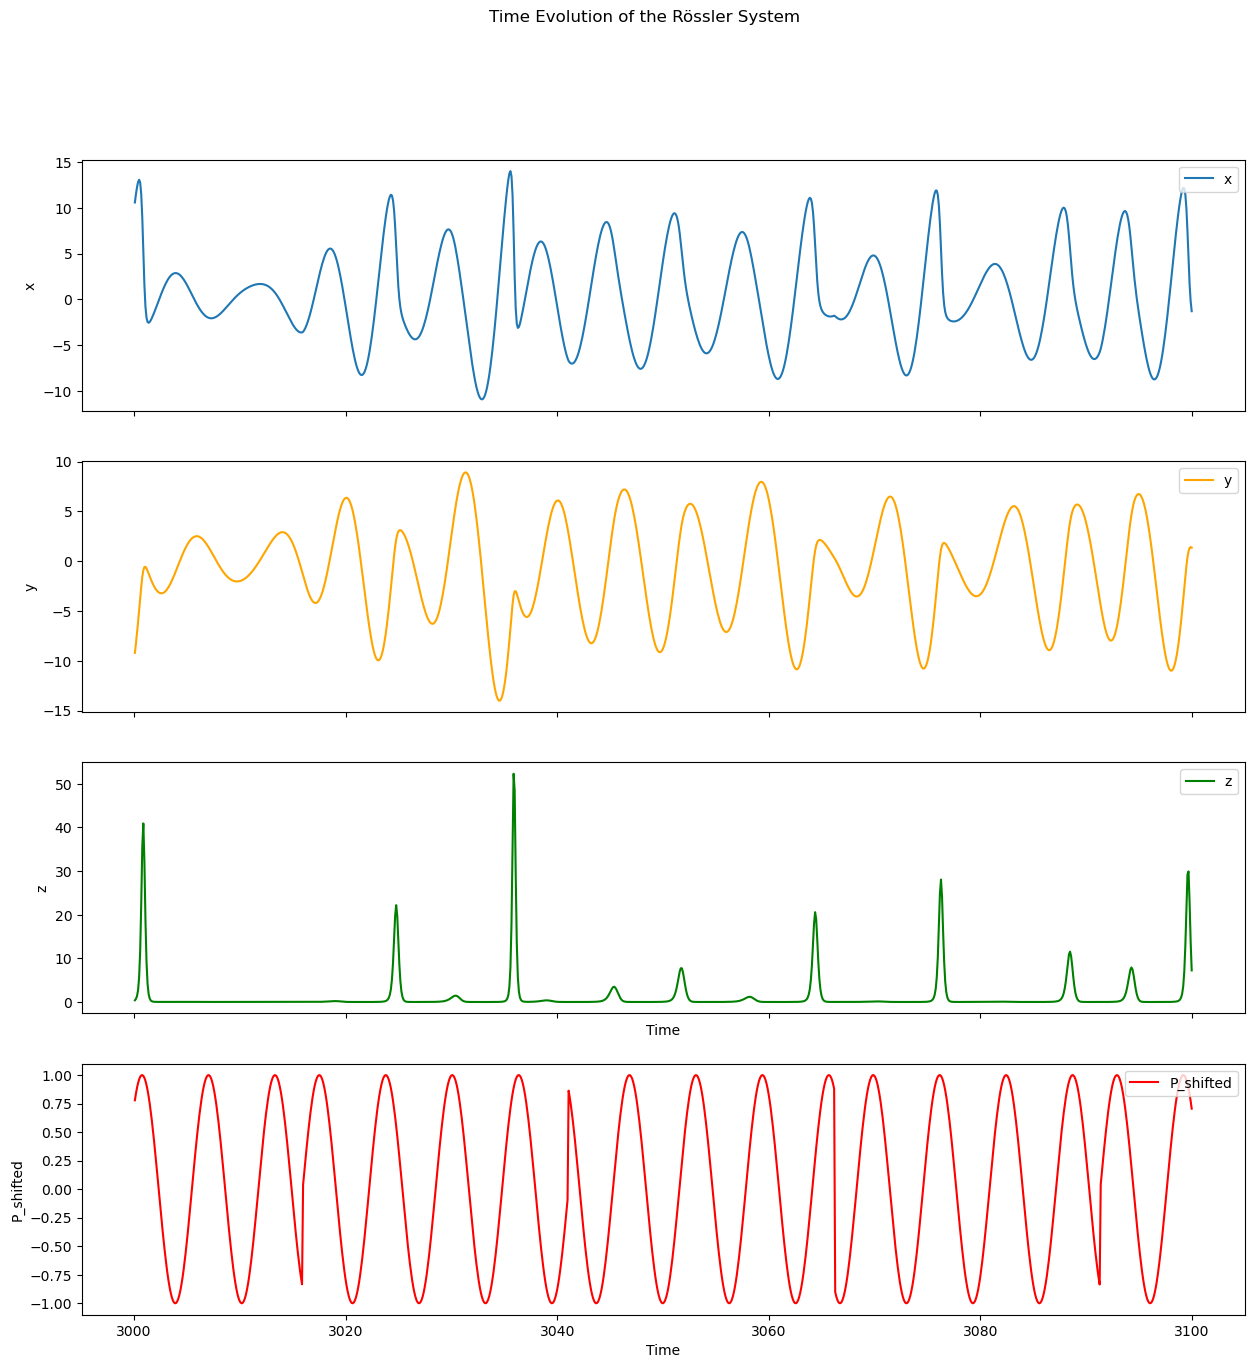

In [4]:
sample = 30000
plot_span = 1000

# XYZの三次元グラフをプロット
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(data_loaded_with_force['x'][sample: sample+3000], data_loaded_with_force['y'][sample: sample+3000], data_loaded_with_force['z'][sample: sample+3000])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Rössler Attractor with P(t)')
plt.show()

# 時間ごとのx, y, zそれぞれのグラフ
fig, axs = plt.subplots(4, 1, figsize=(15, 15), sharex=True)
axs[0].plot(data_loaded_with_force['time'][sample: sample+plot_span], data_loaded_with_force['x'][sample: sample+plot_span], label='x')
axs[0].set_ylabel('x')
axs[0].legend(loc='upper right')

axs[1].plot(data_loaded_with_force['time'][sample: sample+plot_span], data_loaded_with_force['y'][sample: sample+plot_span], label='y', color='orange')
axs[1].set_ylabel('y')
axs[1].legend(loc='upper right')

axs[2].plot(data_loaded_with_force['time'][sample: sample+plot_span], data_loaded_with_force['z'][sample: sample+plot_span], label='z', color='green')
axs[2].set_ylabel('z')
axs[2].set_xlabel('Time')
axs[2].legend(loc='upper right')

axs[3].plot(data_loaded_with_force['time'][sample: sample+plot_span], data_loaded_with_force['P_shifted'][sample: sample+plot_span], label='P_shifted', color='red')
axs[3].set_ylabel('P_shifted')
axs[3].set_xlabel('Time')
axs[3].legend(loc='upper right')

plt.suptitle('Time Evolution of the Rössler System')
plt.show()


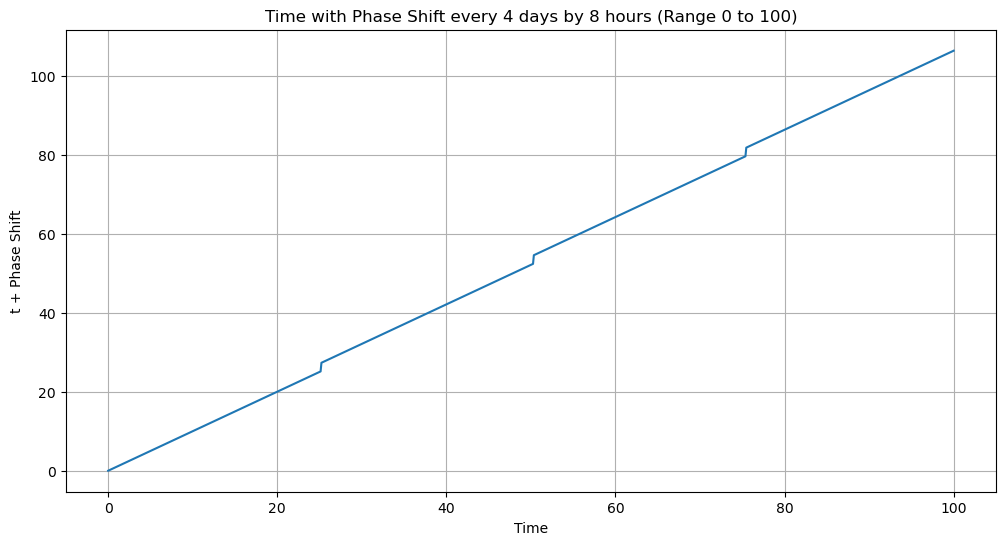

In [5]:
# 位相シフトを計算する関数
def phase_shift(t, shift_hour):
    shift_value = (shift_hour / 24) * 2 * np.pi  # 位相シフトの量
    number_of_shifts = int(t / (4 * 2 * np.pi))  # 4日ごとにシフト
    return number_of_shifts * shift_value

# 時間範囲を0から100まで設定
t = np.linspace(0, 100, 1000)  # 0から100まで
shift_hour = 8  # 8時間シフト

# t に対する phase_shift(t, shift_hour) の計算
phase_shifted_t = t + np.array([phase_shift(ti, shift_hour) for ti in t])

# グラフを描画
plt.figure(figsize=(12, 6))
plt.plot(t, phase_shifted_t)
plt.xlabel('Time')
plt.ylabel('t + Phase Shift')
plt.title('Time with Phase Shift every 4 days by 8 hours')
plt.grid(True)
plt.show()
